# Data Wrangling

Data wrangling is the second step in the Data Science Method. This step consists of multiple components including Data Collection, Data Organization, Data Definitions, and Data Cleaning.  

**Data Wrangling steps** 
  * Data Collection
      - Locating the data
      - Data loading
      - Data joining
  * Data Organization
      -  File structure
      -  Git & Github
  * Data Definition
      - Column names
      - Data types (numeric, categorical, timestamp, etc.)
      - Description of the columns
      - Count or percent per unique values or codes (including NA)
      - The range of values or codes  
  * Data Cleaning
      - NA or missing data
      - Duplicates
      - Outliers

## Data Collection

In [1]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#getting current working directory
print(os.getcwd())

#list of files in the dirctory
print(os.listdir(os.getcwd()))

C:\Users\sanja\Jupyter Code\Git Hub\Online-Shopper-Intention-Capstone
['.git', '.gitattributes', '.ipynb_checkpoints', 'data', 'Data Wrangling.ipynb', 'EDA.ipynb', 'figure', 'model', 'online_shoppers_intention.csv', 'Problem Identification - Capstone 1.pptx', 'Project Report - Capstone 1 - Copy.docx', 'Project Report - Capstone 1.docx', 'README.md']


### Load the data from the csv file

In [3]:
filename = 'online_shoppers_intention.csv'
df = pd.read_csv(filename)
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Data Organization

### Create subfolders in your project directory

In [4]:
#Creating subfolder for data, figure and model

if not os.path.exists('data'):
    os.makedirs('data')

if not os.path.exists('figure'):
    os.makedirs('figure')
    
if not os.path.exists('model'):
    os.makedirs('model')

In [5]:
#list of files in the dirctory
print(os.listdir(os.getcwd()))

['.git', '.gitattributes', '.ipynb_checkpoints', 'data', 'Data Wrangling.ipynb', 'EDA.ipynb', 'figure', 'model', 'online_shoppers_intention.csv', 'Problem Identification - Capstone 1.pptx', 'Project Report - Capstone 1 - Copy.docx', 'Project Report - Capstone 1.docx', 'README.md']


## Data Definition
In this step, you'll review column names, data types, and null values.

In [6]:
#DataFrame columns
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [7]:
#DataFrame dtype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
print(df.nunique())

Administrative               27
Administrative_Duration    3336
Informational                17
Informational_Duration     1259
ProductRelated              311
ProductRelated_Duration    9552
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


<img src = 'figure/Data_desc.png'>

<img src = 'figure/Data_desc_cat.png'>

In [9]:
# categorical feature
df['SpecialDay'] = df['SpecialDay'].astype('object')
df['Month'] = df['Month'].astype('object')
df['OperatingSystems'] = df['OperatingSystems'].astype('object')
df['Browser'] = df['Browser'].astype('object')
df['Region'] = df['Region'].astype('object')
df['TrafficType'] = df['TrafficType'].astype('object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  object 
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  object 
 12  Browser                  12330 non-null  object 
 13  Region                   12330 non-null  object 
 14  TrafficType           

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12316.0,2.317798,3.322754,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12316.0,80.906176,176.860432,-1.0,0.000000,8.000000,93.500000,3398.750000
Informational,12316.0,0.503979,1.270701,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12316.0,34.506387,140.825479,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12316.0,31.763884,44.490339,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12316.0,1196.037057,1914.372511,-1.0,185.000000,599.766190,1466.479902,63973.522230
BounceRates,12316.0,0.022152,0.048427,0.0,0.000000,0.003119,0.016684,0.200000
ExitRates,12316.0,0.043003,0.048527,0.0,0.014286,0.025124,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742


## Data Cleaning

### Handle the missing and NA values

In [15]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]
#Null % seems to be constant throughout

,percent
Administrative,0.001135
Administrative_Duration,0.001135
Informational,0.001135
Informational_Duration,0.001135
ProductRelated,0.001135
ProductRelated_Duration,0.001135
BounceRates,0.001135
ExitRates,0.001135


In [16]:
df[df.isna().any(axis=1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
1065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,2,2,1,Returning_Visitor,False,False
1132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,1,1,1,2,Returning_Visitor,False,False
1133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,4,5,1,Returning_Visitor,False,False
1134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,2,1,2,Returning_Visitor,False,False
1135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,3,2,1,1,Returning_Visitor,False,False
1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,2,1,2,Returning_Visitor,False,False
1473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,2,1,1,Returning_Visitor,True,False
1474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,1,1,6,1,Returning_Visitor,True,False
1475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,2,2,3,1,Returning_Visitor,False,False
1476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,Mar,1,1,2,3,Returning_Visitor,False,False


In [17]:
df.dropna(inplace = True)
df[df.isna().any(axis=1)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


In [20]:
#int features
df['Administrative'] = df['Administrative'].astype('int')
df['Informational'] = df['Informational'].astype('int')
df['ProductRelated'] = df['ProductRelated'].astype('int')

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12316.0,2.317798,3.322754,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12316.0,80.906176,176.860432,-1.0,0.000000,8.000000,93.500000,3398.750000
Informational,12316.0,0.503979,1.270701,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12316.0,34.506387,140.825479,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12316.0,31.763884,44.490339,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12316.0,1196.037057,1914.372511,-1.0,185.000000,599.766190,1466.479902,63973.522230
BounceRates,12316.0,0.022152,0.048427,0.0,0.000000,0.003119,0.016684,0.200000
ExitRates,12316.0,0.043003,0.048527,0.0,0.014286,0.025124,0.050000,0.200000
PageValues,12316.0,5.895952,18.577926,0.0,0.000000,0.000000,0.000000,361.763742


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  int32  
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  int32  
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  int32  
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12316 non-null  float64
 9   SpecialDay               12316 non-null  object 
 10  Month                    12316 non-null  object 
 11  OperatingSystems         12316 non-null  object 
 12  Browser                  12316 non-null  object 
 13  Region                   12316 non-null  object 
 14  TrafficType           

### Handle duplicate values

In [23]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Feb,1,1,1,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Mar,2,2,4,1,Returning_Visitor,False,False
483,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Mar,3,2,3,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0,Dec,1,13,9,20,Returning_Visitor,False,False


In [24]:
print(duplicateRowsDF.nunique(axis=1))

158      6
178      7
418      5
456      7
483      7
        ..
11934    6
11938    6
12159    6
12180    8
12185    9
Length: 117, dtype: int64


In [25]:
duplicateRowsDF.Revenue.unique()

array([False])

In [26]:
df.drop_duplicates(inplace = True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12199.0,2.340028,3.330851,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12199.0,81.682143,177.528168,-1.0,0.000000,9.000000,94.750000,3398.750000
Informational,12199.0,0.508812,1.275817,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12199.0,34.837336,141.458499,-1.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12199.0,32.058447,44.600911,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12199.0,1207.508189,1919.927472,-1.0,193.583333,609.541667,1477.564759,63973.522230
BounceRates,12199.0,0.020447,0.045403,0.0,0.000000,0.002930,0.016667,0.200000
ExitRates,12199.0,0.041497,0.046247,0.0,0.014223,0.025000,0.048485,0.200000
PageValues,12199.0,5.952500,18.657792,0.0,0.000000,0.000000,0.000000,361.763742


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12199 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12199 non-null  int32  
 1   Administrative_Duration  12199 non-null  float64
 2   Informational            12199 non-null  int32  
 3   Informational_Duration   12199 non-null  float64
 4   ProductRelated           12199 non-null  int32  
 5   ProductRelated_Duration  12199 non-null  float64
 6   BounceRates              12199 non-null  float64
 7   ExitRates                12199 non-null  float64
 8   PageValues               12199 non-null  float64
 9   SpecialDay               12199 non-null  object 
 10  Month                    12199 non-null  object 
 11  OperatingSystems         12199 non-null  object 
 12  Browser                  12199 non-null  object 
 13  Region                   12199 non-null  object 
 14  TrafficType           

## Outliers Detection 

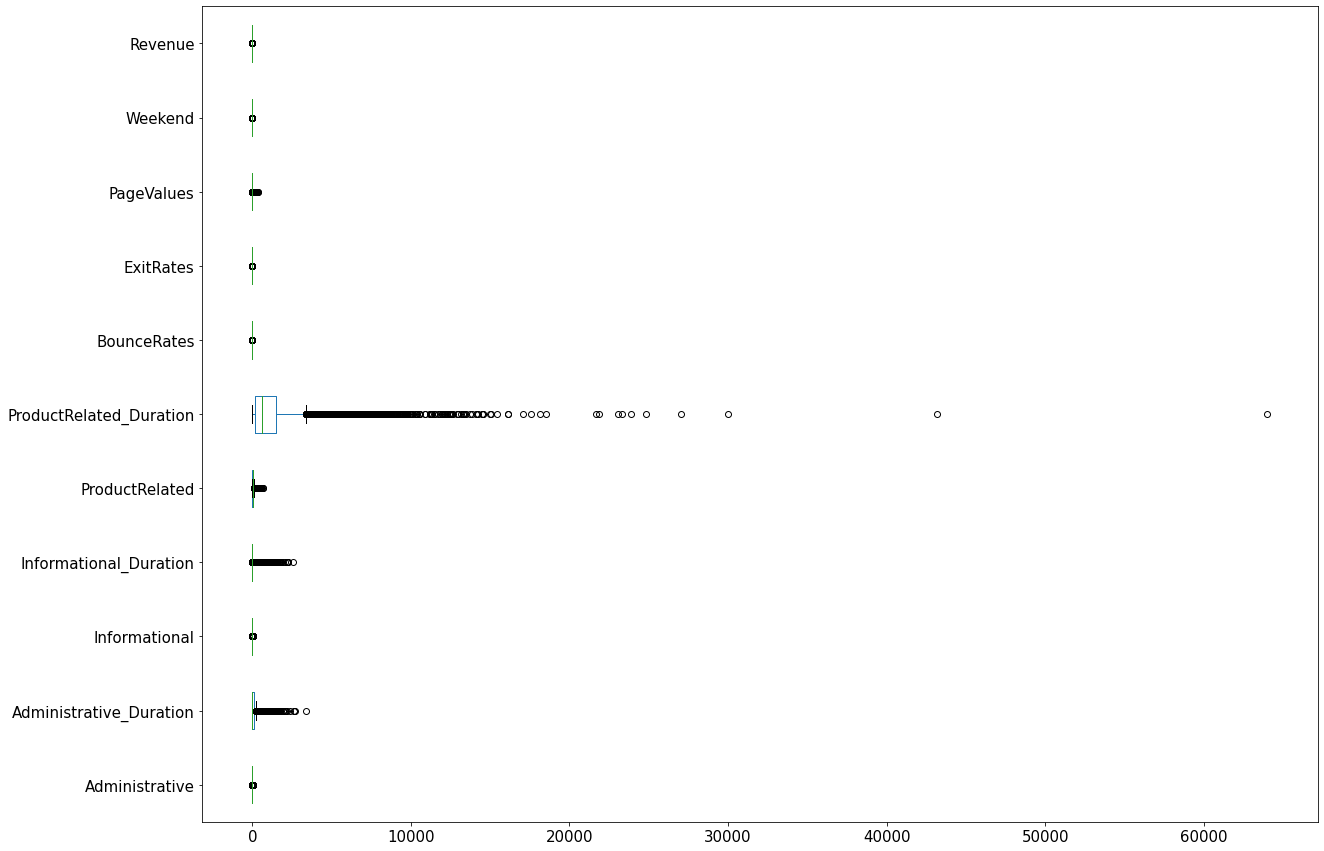

In [28]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15,figsize =(20,15))

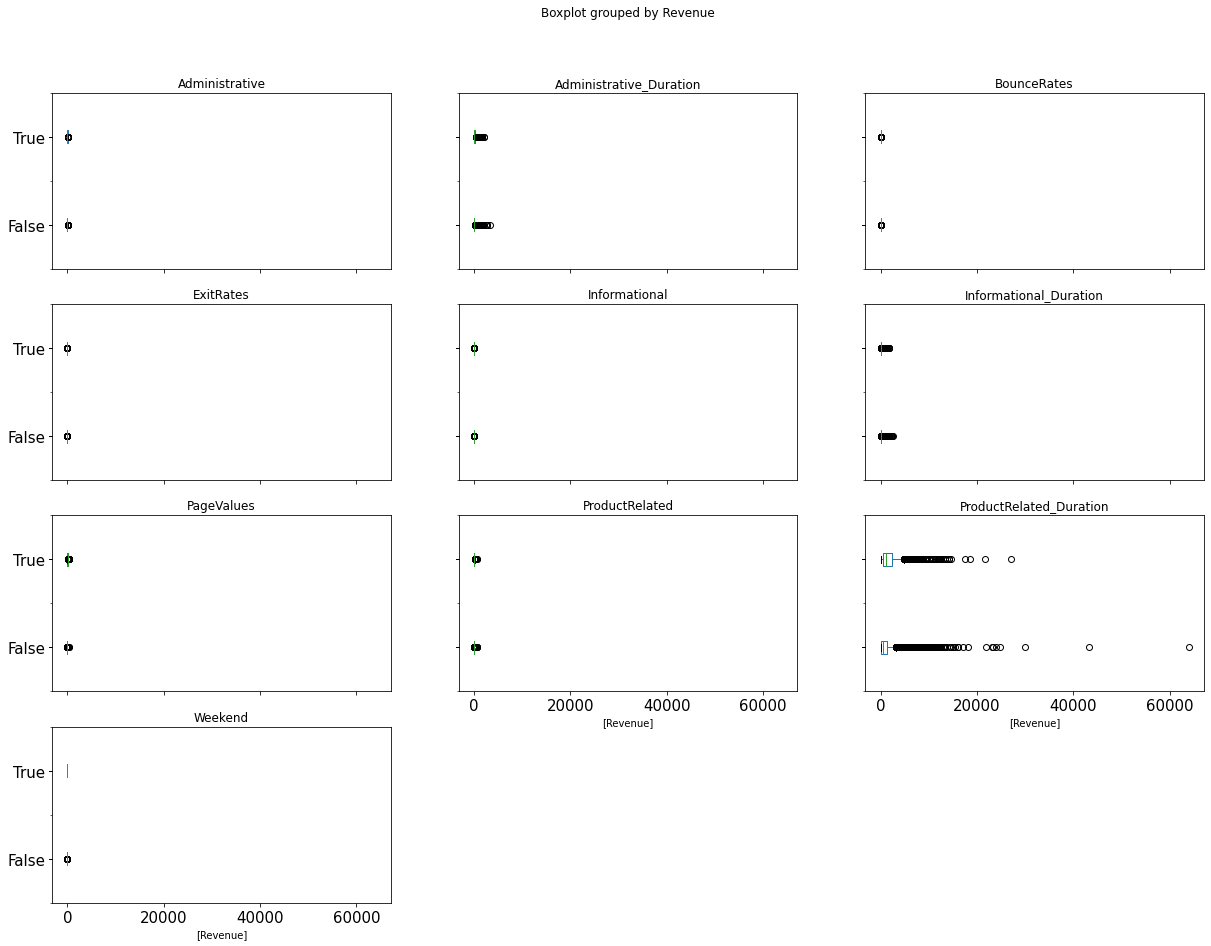

In [29]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15,figsize =(20,15),by='Revenue')

In [30]:
"""from scipy import stats

z_scores = stats.zscore(df.select_dtypes(exclude = ['bool','object']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]
new_df.info()
df = new_df.copy()"""

"from scipy import stats\n\nz_scores = stats.zscore(df.select_dtypes(exclude = ['bool','object']))\nabs_z_scores = np.abs(z_scores)\nfiltered_entries = (abs_z_scores < 3).all(axis=1)\nnew_df = df[filtered_entries]\nnew_df.info()\ndf = new_df.copy()"

In [31]:
df.groupby('Revenue').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Revenue,,,,,,,,,,,,,,,,,
False,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291,10291
True,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908,1908


In [32]:
Q1 = df['ProductRelated_Duration'].quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3 = df['ProductRelated_Duration'].quantile(0.75)

# Now calculate the IQR, storing it in a variable called IQR.
IQR = Q3-Q1

# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 
df = df[~((df['ProductRelated_Duration'] < (Q1 - 1.5 * IQR)) |(df['ProductRelated_Duration']> (Q3 + 1.5 * IQR)))]

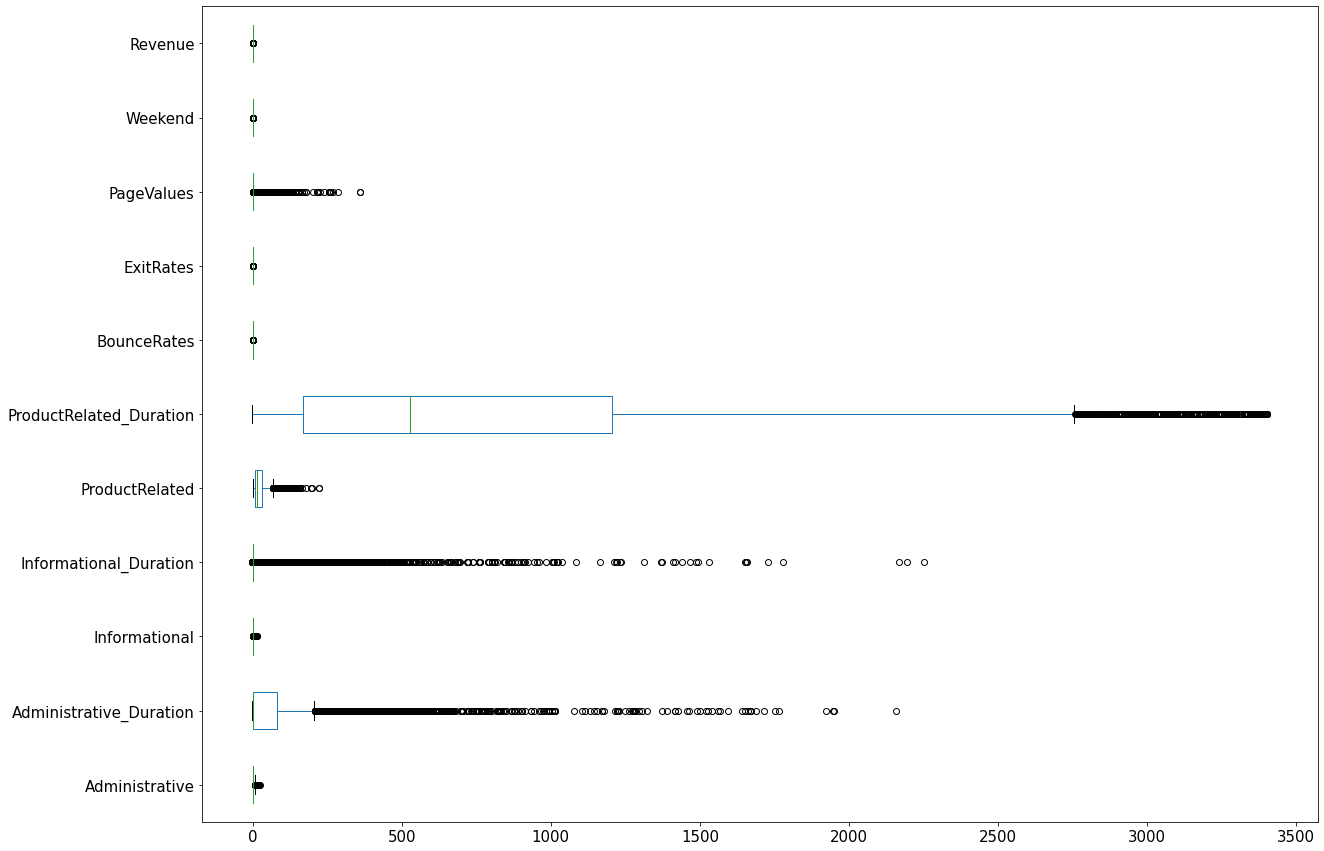

In [33]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15,figsize =(20,15))

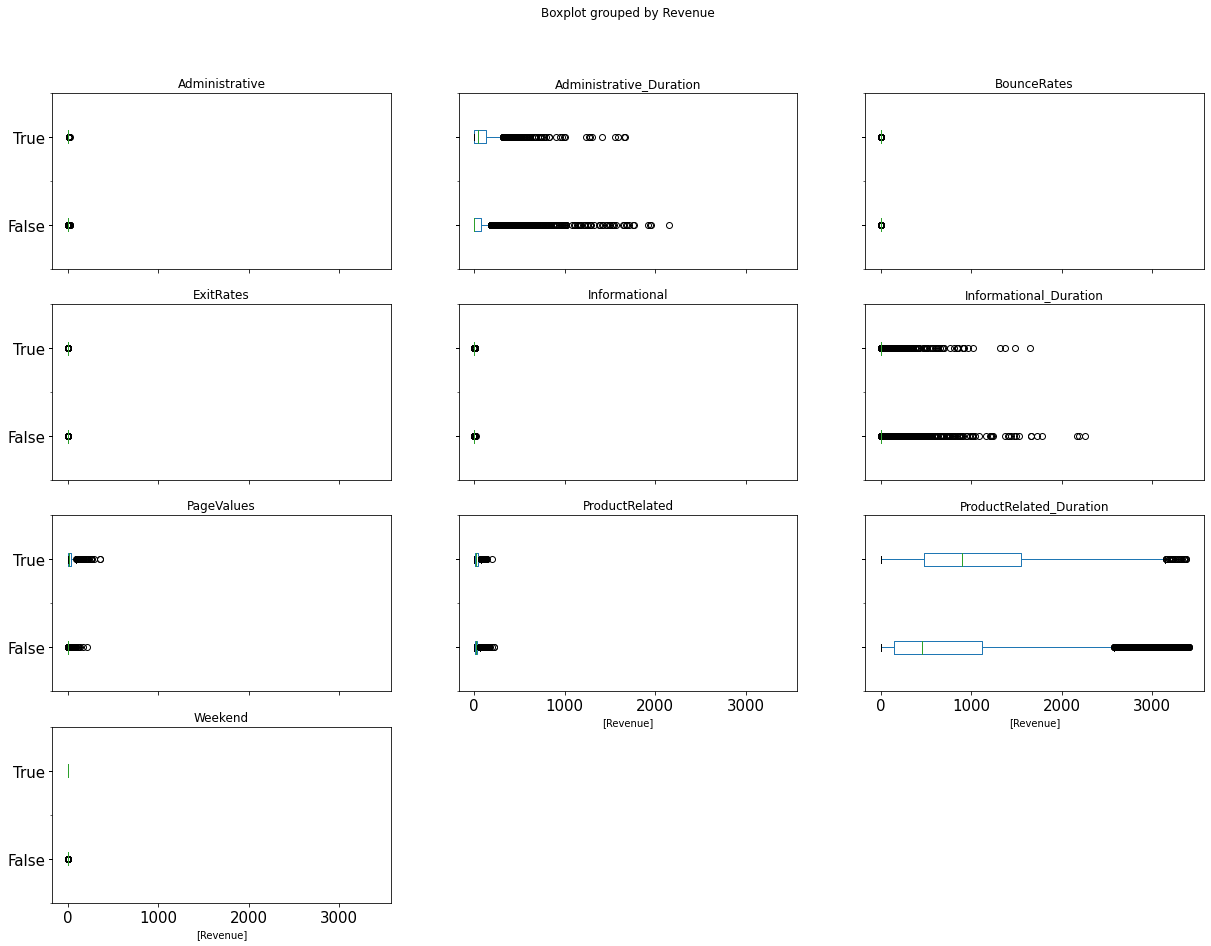

In [34]:
#create a boxplot for every column in df
boxplot = df.boxplot(grid=False, vert=False,fontsize=15,figsize =(20,15),by='Revenue')

In [35]:
df.groupby('Revenue').count()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Revenue,,,,,,,,,,,,,,,,,
False,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629,9629
True,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619,1619


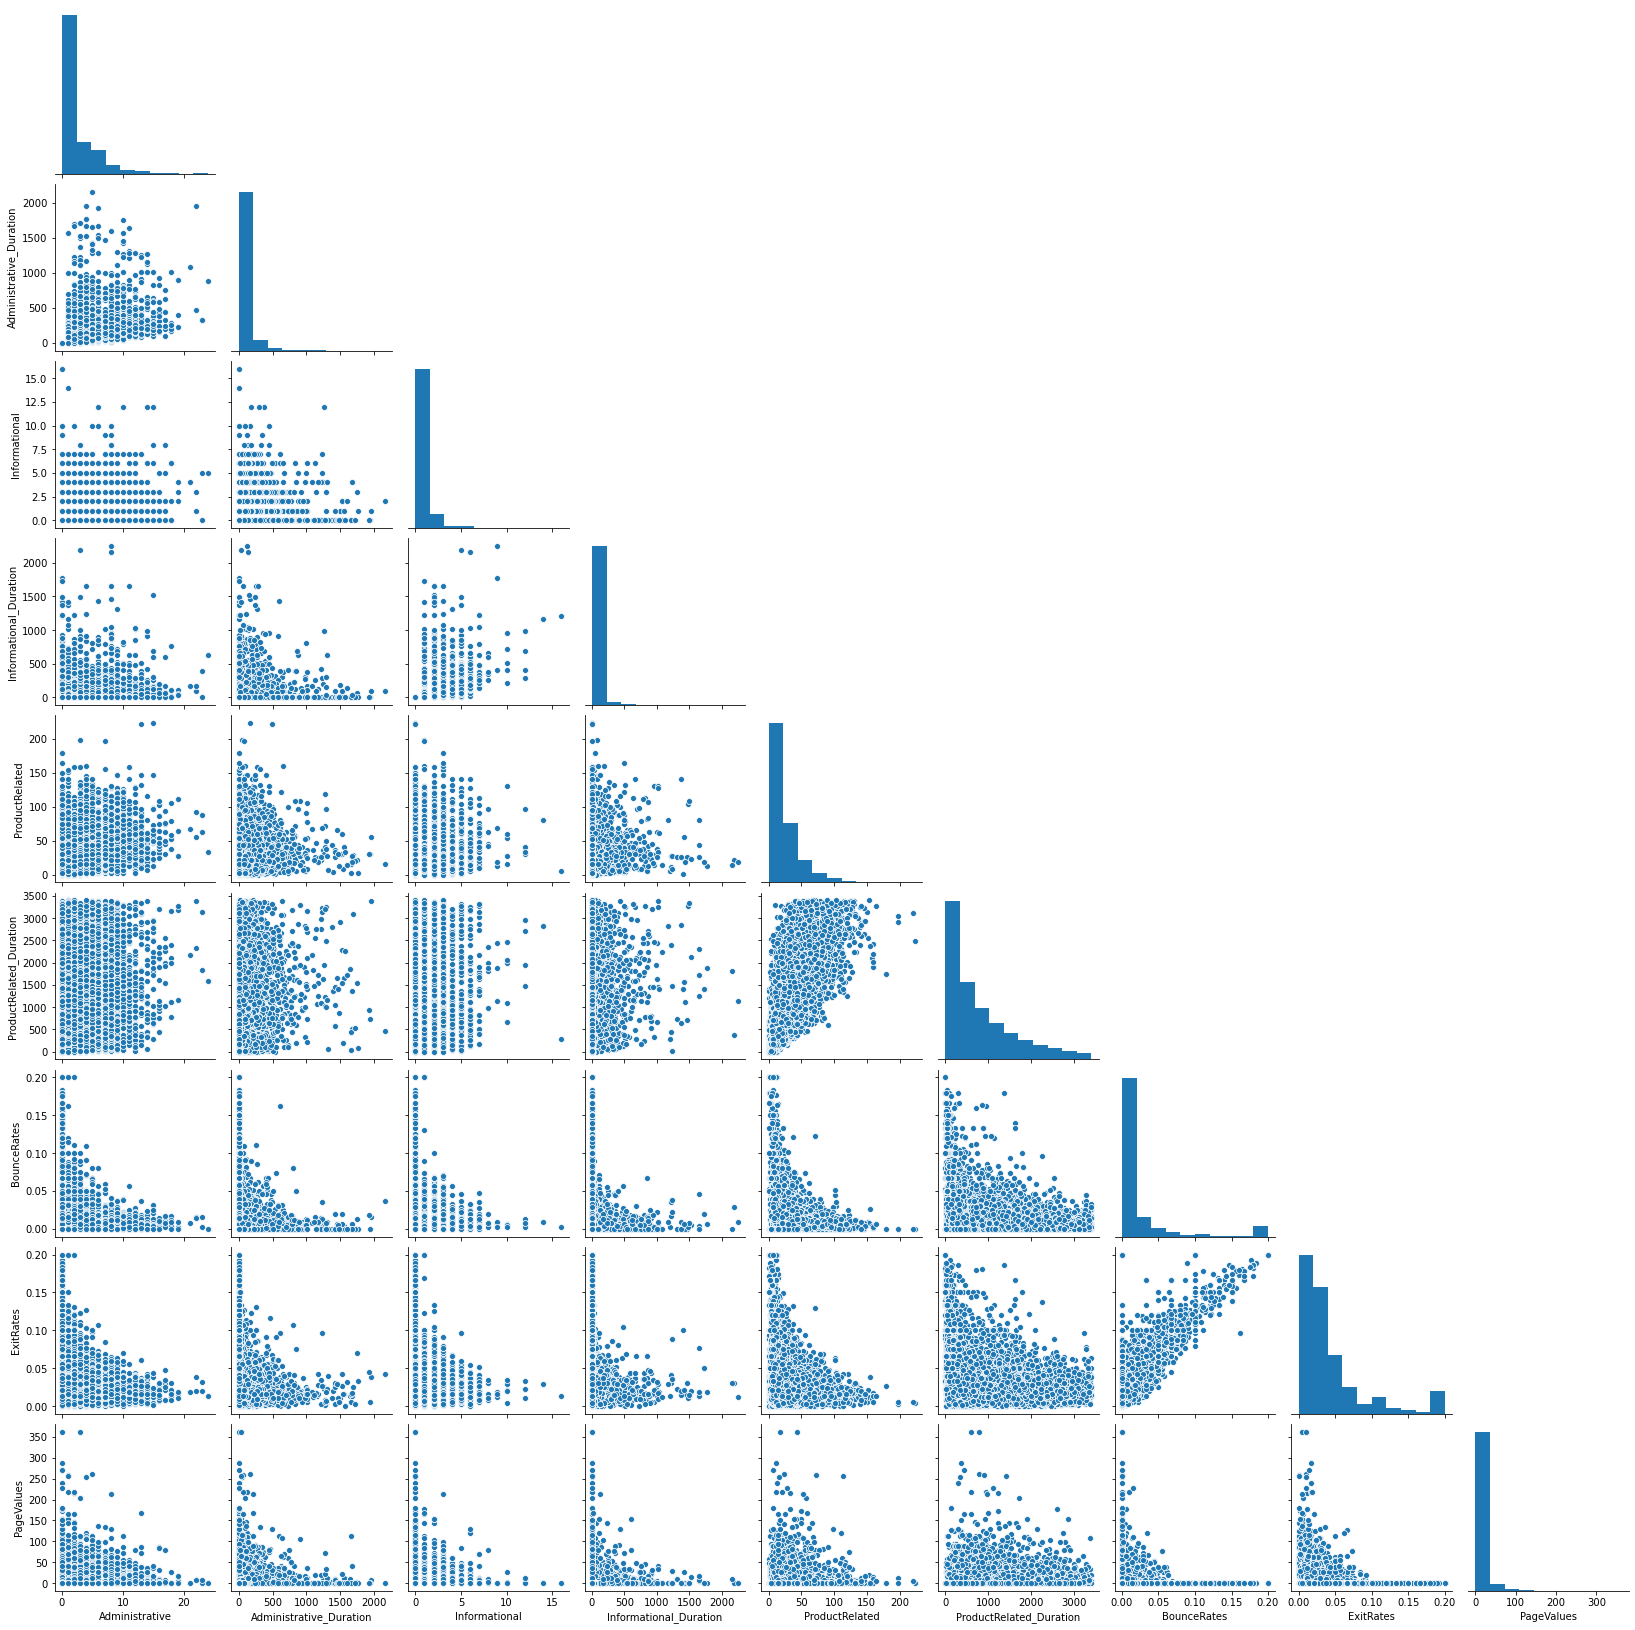

In [36]:
#df_1 = pd.concat([df.select_dtypes(exclude = ['bool','object']), df['Revenue']], axis=1)
#df_1['Revenue'] = df_1['Revenue'].astype('object')
df_1 = df.select_dtypes(exclude = ['bool','object'])
g = sns.pairplot(df_1,corner=True)

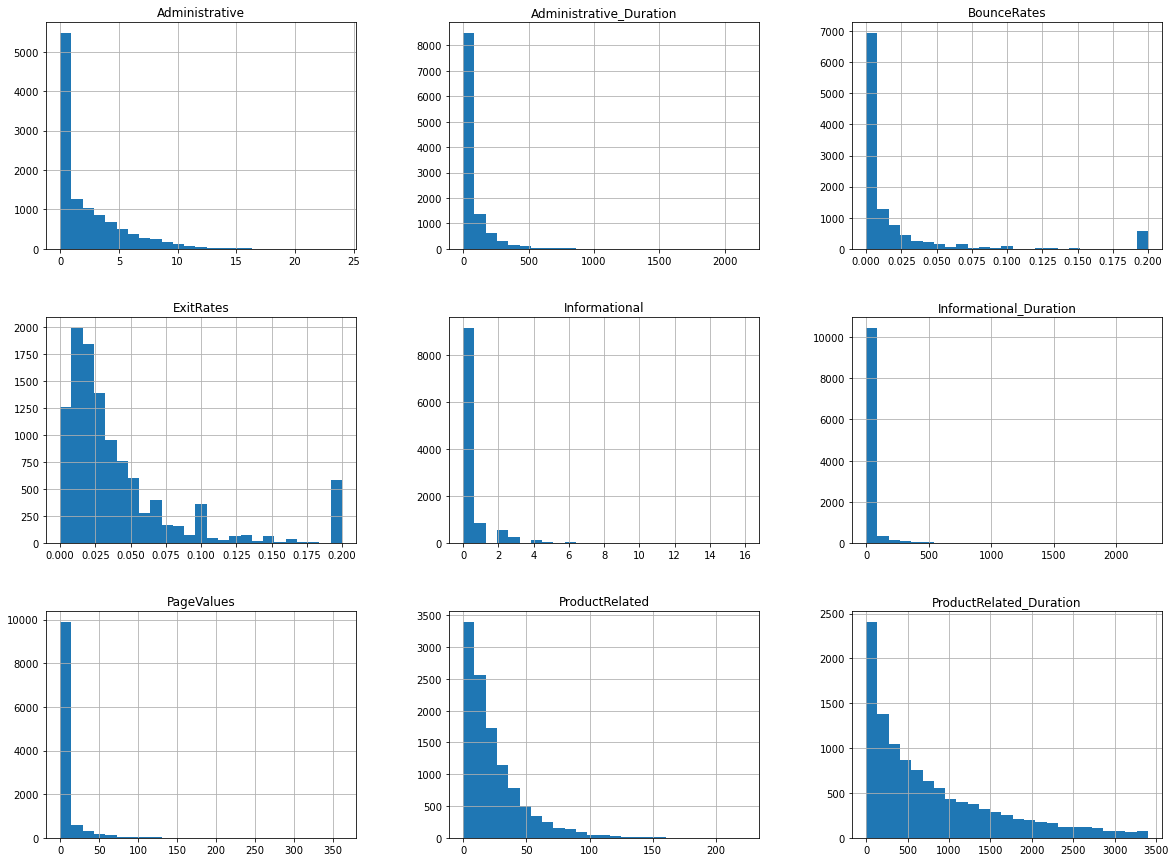

In [37]:
df_1.hist(bins = 25,figsize =(20,15))
plt.show()

# Export data to a new csv file 

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11248 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           11248 non-null  int32  
 1   Administrative_Duration  11248 non-null  float64
 2   Informational            11248 non-null  int32  
 3   Informational_Duration   11248 non-null  float64
 4   ProductRelated           11248 non-null  int32  
 5   ProductRelated_Duration  11248 non-null  float64
 6   BounceRates              11248 non-null  float64
 7   ExitRates                11248 non-null  float64
 8   PageValues               11248 non-null  float64
 9   SpecialDay               11248 non-null  object 
 10  Month                    11248 non-null  object 
 11  OperatingSystems         11248 non-null  object 
 12  Browser                  11248 non-null  object 
 13  Region                   11248 non-null  object 
 14  TrafficType           

In [39]:
df.to_csv('data\clean_data.csv',index = False)